***Importing libraries***

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

***Reading the dataset***

In [26]:
file_path_train = r'C:\Users\User\Desktop\Main\7 semester\ML\train_7_8.csv'
df_train = pd.read_csv(file_path_train)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Data preprocessing***

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
df_train.drop_duplicates(inplace=True)

***Checking the number of unique values of each column***

In [30]:
for col in df_train.columns:
    print(col, len(df_train[col].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


***Dropping the unimportant columns***

In [31]:
df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

***Vizualizing distribution of values***

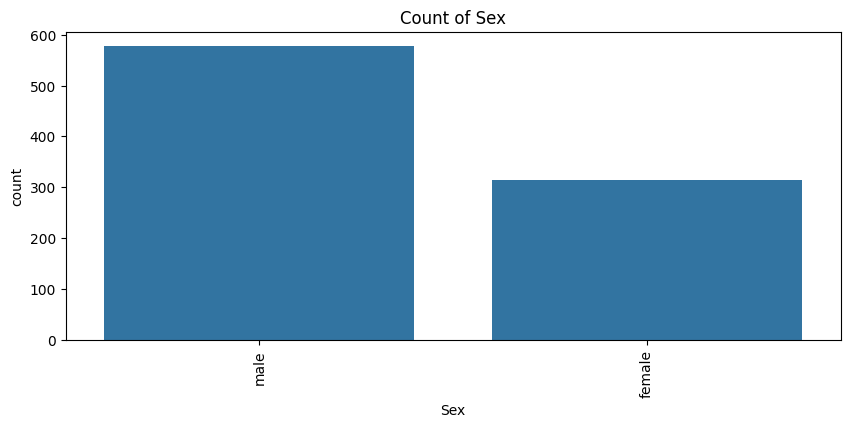

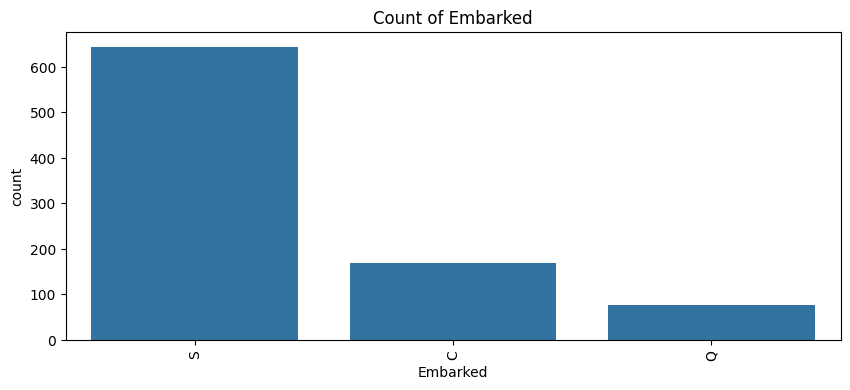

In [32]:
for column_name in df_train.columns:
    if df_train[column_name].dtype == 'object':
        plt.figure(figsize=(10, 4))  
        sns.countplot(x=column_name, data=df_train)
        plt.title(f'Count of {column_name}')
        plt.xticks(rotation=90) 
        plt.show()

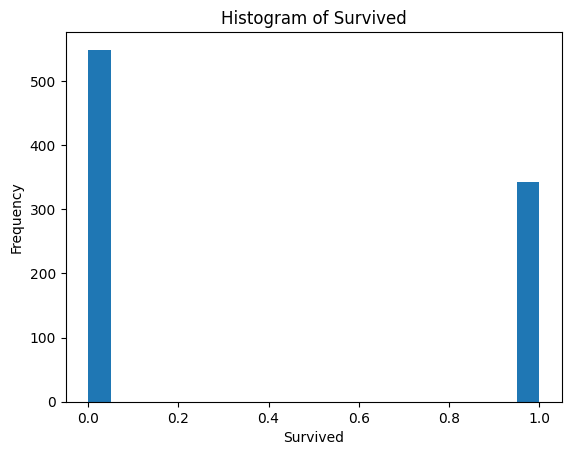

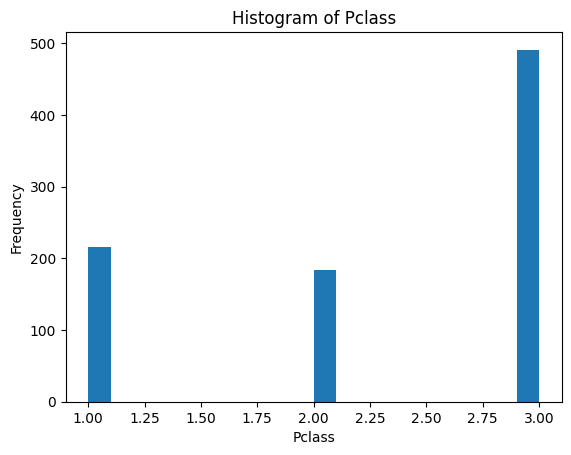

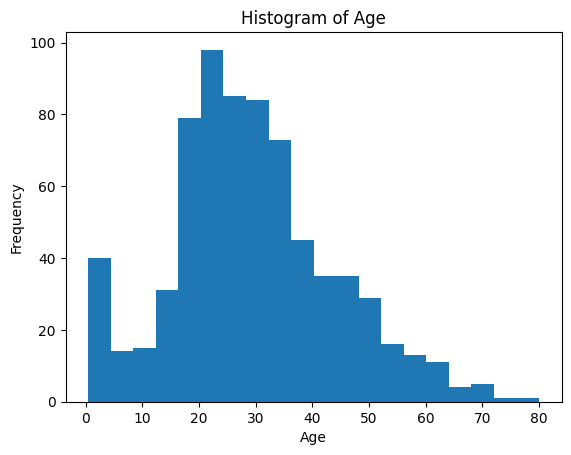

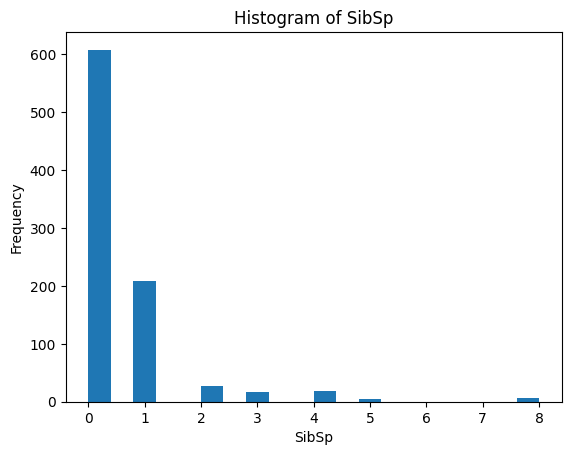

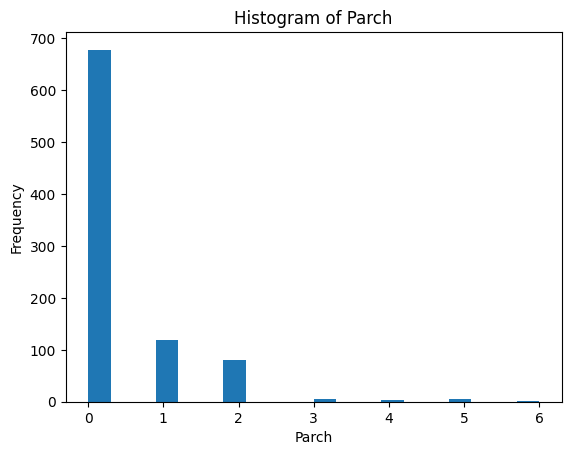

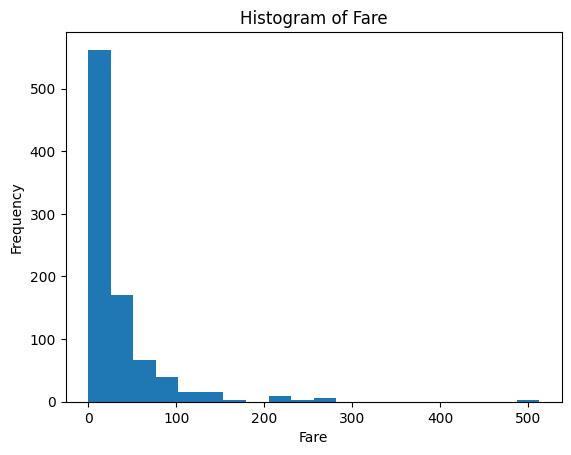

In [33]:
for column_name in df_train.columns:
    if df_train[column_name].dtype in ['int64', 'float64']:
        plt.hist(df_train[column_name], bins=20)
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

In [34]:
df_train.drop(columns=['SibSp', 'Parch'], axis=1, inplace=True)

***Dealing with null values***

In [35]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [36]:
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
object_cols = df_train.select_dtypes(include='object').columns

# Fill null values in numerical columns with mean
for col in numerical_cols:
    df_train[col].fillna(df_train[col].mean(), inplace=True)

# Fill null values in object columns with mode
for col in object_cols:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)

In [37]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

***Obtaining train&test dataframes***

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode selected columns
for col in object_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])

In [39]:
Y = df_train['Survived']
X = df_train.drop('Survived', axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.3, random_state=42)

***Decision Tree Classifier***

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision tree classifier model: {accuracy}")

Accuracy of the Decision tree classifier model: 0.7649253731343284


***Applying PCA***

In [111]:
from sklearn.decomposition import PCA

print(f"Accuracy without PCA: {accuracy}\n")

feat = {}

for i in range(X_train.shape[1]):
    for k in range(i+1, X_train.shape[1]):
        X_train_pca = X_train[:, [i, k]]
        X_test_pca = X_test[:, [i, k]]
        
        # Fit PCA
        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(X_train_pca)
        X_test_pca = pca.transform(X_test_pca)

        # Train a model on PCA-transformed data
        model_pca = DecisionTreeClassifier(random_state=42)
        model_pca.fit(X_train_pca, y_train)
        y_pred_pca = model_pca.predict(X_test_pca)
        accuracy_pca = accuracy_score(y_test, y_pred_pca)
        feat[f'{list(X.columns[[i, k]])}'] = accuracy_pca
        
        print(f"Accuracy with PCA by {list(X.columns[[i, k]])}: {accuracy_pca}")

max_key = max(feat, key=feat.get)  # Get the key with the max value
max_value = feat[max_key]  # Get the max value

print(f"\nFeatures with max value: {max_key}: {max_value}")

Accuracy without PCA: 0.7649253731343284

Accuracy with PCA by ['Pclass', 'Sex']: 0.7723880597014925
Accuracy with PCA by ['Pclass', 'Age']: 0.6753731343283582
Accuracy with PCA by ['Pclass', 'Fare']: 0.6865671641791045
Accuracy with PCA by ['Pclass', 'Embarked']: 0.6791044776119403
Accuracy with PCA by ['Sex', 'Age']: 0.7574626865671642
Accuracy with PCA by ['Sex', 'Fare']: 0.7947761194029851
Accuracy with PCA by ['Sex', 'Embarked']: 0.7910447761194029
Accuracy with PCA by ['Age', 'Fare']: 0.6529850746268657
Accuracy with PCA by ['Age', 'Embarked']: 0.5671641791044776
Accuracy with PCA by ['Fare', 'Embarked']: 0.6828358208955224

Features with max value: ['Sex', 'Fare']: 0.7947761194029851


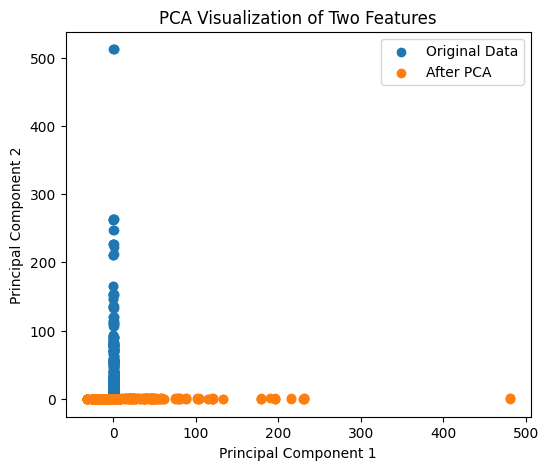

In [45]:
features = ['Sex', 'Fare']  # Replace with your feature column names
X_selected = X[features]

# Apply PCA to the selected features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Plotting the original data against PCA-transformed data
plt.figure(figsize=(6, 5))
plt.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], label='Original Data')
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Two Features')
plt.legend()
plt.show()

***Another Data Preprocessing tools***

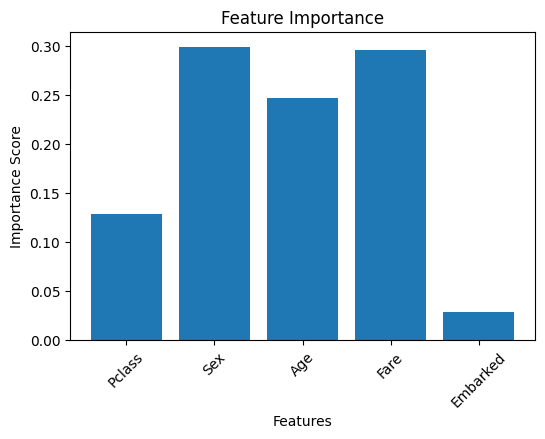

In [109]:
feature_importance = clf.feature_importances_

feature_names = list(X.columns)
feature_importance_with_names = dict(zip(feature_names, feature_importance))

plt.figure(figsize=(6, 4))
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [108]:
from sklearn.inspection import permutation_importance

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

r = permutation_importance(model, X_train, y_train,
                           n_repeats=30,
                           random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    print(f"{X.columns[i]:<9}"
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")

Sex      0.240 +/- 0.012
Age      0.207 +/- 0.017
Fare     0.196 +/- 0.010
Pclass   0.171 +/- 0.012
Embarked 0.036 +/- 0.006


In [59]:
X_af = X.copy()
X_af.drop(columns=['Age', 'Embarked'], axis=1, inplace=True)

X_normalized_af = scaler.fit_transform(X_af)
X_train_af, X_test_af = train_test_split(X_normalized_af, test_size=0.3, random_state=42)

In [106]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf_af = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf_af.fit(X_train_af, y_train)

# Make predictions on the test set
y_pred_af = clf_af.predict(X_test_af)

# Calculating evaluation metrics
accuracy_af = accuracy_score(y_test, y_pred_af)
print(f"Accuracy of the Decision tree classifier model before \ after dropping: {accuracy} \ {accuracy_af}")

Accuracy of the Decision tree classifier model before \ after dropping: 0.7649253731343284 \ 0.8097014925373134


***Evaluation Metrics***

Evalution Metrics for the Decision tree classifier model

MSE: 0.23507462686567165
RMSE: 0.48484495136659067

R2 score: 0.031158547082113963

F1 score: 0.7096774193548386

Accuracy: 0.7649253731343284

True Negatives: 128
False Positives: 29
False Negatives: 34
True Positives: 77
Confusion Matrix: [[128  29]
 [ 34  77]]

Log loss: 8.472948371322316

Roc Auc score: 0.7544901589487577


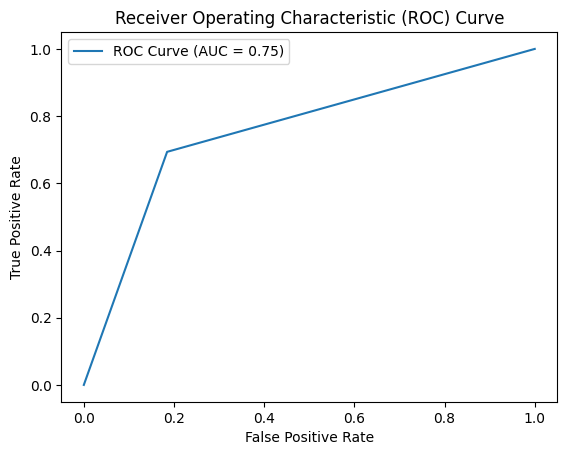

In [49]:
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, confusion_matrix, log_loss, roc_curve, roc_auc_score

print('Evalution Metrics for the Decision tree classifier model\n')
# RMSe
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False returns RMSE
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# R2 score
r_squared = r2_score(y_test, y_pred)
print(f"\nR2 score: {r_squared}")

# F1 score
f1 = f1_score(y_test, y_pred)
print(f"\nF1 score: {f1}")

# Accuracy
print(f"\nAccuracy: {accuracy}")

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"\nTrue Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

# Log loss
logloss = log_loss(y_test, y_pred)
print(f"\nLog loss: {logloss}")

# ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"\nRoc Auc score: {roc_auc}")

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

***Research***

In [100]:
from sklearn.model_selection import GridSearchCV

# Define the parameters you want to search through
param_grid = {
    'max_depth': list(range(1, 31)),
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 5)),
    'max_features': list(range(2, 5)),
    'max_leaf_nodes': [None, 5, 10, 20]
}

# Create the classifier
clf_rs = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(clf_rs, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_clf = DecisionTreeClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rs = best_clf.predict(X_test)

# Calculating evaluation metrics
accuracy_rs = accuracy_score(y_test, y_pred_rs)
print(f"Accuracy of the Decision tree classifier model: {accuracy_rs} \n \nObtained by these parameters: {best_params}")

Accuracy of the Decision tree classifier model: 0.8171641791044776 
 
Obtained by these parameters: {'max_depth': 7, 'max_features': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
